# Phase 4 Code Challenge

Make necessary imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, silhouette_score

import nltk
import re
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.cluster import KMeans

[nltk_data] Downloading package punkt to /Users/gadamico/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gadamico/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Question 1

You are given a dataset containing various physical characteristics of the seeds of three distinct species of wheat. Your job will be to tune/train a KNN classifier that can predict the species based on the provided features.

Load in the data:

In [2]:
wheat_df = pd.read_csv('wheat_seeds.csv')

Inspect this dataframe and its statistics:

In [3]:
wheat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      174 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [4]:
wheat_df.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,174.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.869909,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023447,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.856675,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.872300,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.885625,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


There are a few NaNs in the compactness column and a quick look at the summary statistics reveal that the mean and variance for some of the features are significantly different. We are going to simple impute the NaN with the mean and standard scale the features.

#### a.

What fact about the KNN algorithm makes it necessary to standard scale the features? Explain.

In [ ]:
# Your answer here:

"""


"""

#### b. 

We'll be setting up a Pipeline to do the imputation, scaling, and then passing the data on to the KNN model. What problem can pipelines help avoid during cross-validation?

In [ ]:
# Your answer here:

"""


"""

Now we'll create a pipeline that performs a couple transformations before passing the data to a KNN estimator.

In [7]:
# Run this cell without changes

steps = [('imp', SimpleImputer(strategy='mean')), ('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier(n_neighbors=30))]
pipe = Pipeline(steps) 

#### c.

Split the target and features and conduct a 70-30 train-test split. Use a random state of 42 for the train_test_split. Save the train and test set features to X_train, X_test respectively. Save the train and test set labels to y_train, y_test respectively.

In [ ]:
# CodeGrade step1.1
# Replace None with appropriate code
# do the required data splitting here

### YOUR CODE BEGINS HERE
X = None
y = None

X_train, X_test, y_train, y_test = None
### YOUR CODE ENDS HERE

A quick perusal shows that the train set is fairly balanced. We'll thus use classification accuracy as our metric for evaluating our train/test sets.

In [9]:
y.value_counts()

2    68
1    66
3    65
Name: Type, dtype: int64

#### d.

Train the pipeline and evaluate accuracy on the test set. **Save your predicted values on the test set to *y_pred***. **Save your computed test accuracy score to the variable *test_acc***.

In [ ]:
# CodeGrade step1.2
# Replace None with appropriate code
### YOUR CODE BEGINS HERE
y_pred = None
test_acc = None
### YOUR CODE ENDS HERE

Tuning the hyperparameters of the transformers and estimators in our pipeline can be accomplished using a grid search cross validation or a randomized search cross validation.

#### e.

Create a GridSearchCV on the pipeline and save it to an object called *grid_knn*:
- create a parameter grid that allows the search to tune the following:
    - n = 1, 5, 10, 20, 30 nearest neighbors for KNN
    - mean and mode strategies for imputation
- perform a $k=5$ cross validation on our pipeline estimator.
- gridsearch the pipeline using a scoring metric of accuracy
- Extract the best model from the gridsearch and save it to a variable *best_pipe*

In [ ]:
# CodeGrade step1.3
### BEGIN YOUR CODE HERE
params = None

grid_knn = None

best_pipe = None

### END CODE HERE

The best parameters are:

In [12]:
set(grid_knn.best_params_.values())

{5, 'mean'}

In [13]:
print(grid_knn.best_params_)

{'imp__strategy': 'mean', 'knn__n_neighbors': 5}


Retrain **best_pipe** (your best model from cross validation) on your entire train set and predict on the true hold-out test set. 
- Save model predictions to a variable **y_best_pred**
- Evaluate the model accuracy on the test set and save it to a variable **tuned_test_acc**.

In [ ]:
# CodeGrade step1.4
# Replace None with appropriate code
#### YOUR CODE BEGINS HERE

y_best_pred = None
tuned_test_acc = None

#### YOUR CODE ENDS HERE

## Question 2

Random forests are an ensemble tree method that aggregates the results of many randomized decision trees in order to construct a classifier/regressor that often performs better than a single decision tree. 

#### a.

Identify the two main methods of randomization used in random forests. How are these methods employed in the random forest algorithm, and how do they help to combat the high variance that tends to characterize decision-tree models?

In [ ]:
# Answer here:

"""


"""

#### b.

In order to get a random forest that generalizes well, it's typically necessary to tune some hyperparameters. In the language of Sklearn's implementation, one of the most relevant hyperparameters is `max_depth`. Describe this hyperparameter and how it can factor into model performance.

In [ ]:
# Answer here:

"""



"""

## Question 3

You have recieved a collection of Amazon Kindle book reviews. The text has been labeled with a positive (1) or negative (0) sentiment. You are tasked with training a Sentiment Analyzer off of this free text data. First, let's load in the data.

In [17]:
sentiment_data = pd.read_csv('sentiment_analysis.csv')
sentiment_data.head()

,reviewText,target
0,This book was the very first bookmobile book I...,1.0
1,"When I read the description for this book, I c...",0.0
2,I just had to edit this review. This book is a...,1.0
3,I don't normally buy 'mystery' novels because ...,1.0
4,"This isn't the kind of book I normally read, a...",1.0


One of the most important tasks before attempting to construct feature vectors and modeling is to tokenize and then normalize/preprocess the text. This can include:
- lower casing
- removing numerics 
- removing stopwords
- stemming/lemmatization

#### a.

Explain why stop word removal might be a useful preprocessing step prior to any given predictive task.

In [ ]:
# Answer here:

"""



"""

The following function takes in the reviewText column in our sentiment_data dataframe and preprocesses the documents. Run the following cell. This may take a minute. The preprocessed text will be saved to a new column in our sentiment_data dataframe.

In [19]:
# RUN THIS CELL WITHOUT CHANGES!!!!

def tokenize_and_preprocess(reviews):
    
    stop_words = stopwords.words('english')
    patt = re.compile(r'\b(' + r'|'.join(stop_words) + r')\b\s+') 

    preproc_step1 = sentiment_data.reviewText.str.lower().str.replace(
        r'[0-9]+', '',regex = True).str.replace(patt, '', regex = True)
    
    # tokeniz. result is a Pandas series of document represented as lists of tokens
    preproc1_tokenized = preproc_step1.apply(word_tokenize)
    
    # inner function. takes in single document as token list.
    # processes further by stemming and removing non-alphabetic characters
    
    def remove_punct_and_stem(doc_tokenized):
        
        stemmer = SnowballStemmer('english')
        
        filtered_stemmed_tok = [stemmer.stem(tok) for tok in doc_tokenized if tok.isalpha() ]
        
        return " ".join(filtered_stemmed_tok)
        
    preprocessed = preproc1_tokenized.apply(remove_punct_and_stem)
        
    return preprocessed

sentiment_data['preprocessed_text'] =tokenize_and_preprocess(sentiment_data.reviewText)

Our text has been preprocessed and we can create a BoW matrix. You will use a TF-IDF vectorize for this task. But before doing that:

#### b.

Explain, in words, how the TF-IDF vectorizer assigns weights to features (tokens) in a given document.

In [ ]:
# Answer here:

"""


"""

#### c.

- Save the relevant text and target to X_sent, y_sent.
- Train/test split with a random_state = 42. Use a 70-30 train-test split and save to the relevant variables below.

In [ ]:
# CodeGrade step3.1
# Replace None with appropriate code

### YOUR CODE BEGINS HERE

X_sent = None
y_sent = None

X_sent_train, X_sent_test, y_sent_train, y_sent_test = None

### YOUR CODE ENDS HERE

#### d.

Create a pipeline that TF-IDF vectorizes text input and then feeds it into a Multinomial Naive Bayes classifier. Ensure that tokens that are in less than 1% of the documents and in more than 90% of the documents are filtered out by our pipeline. Save the pipeline as a variable **nlp_pipe**.

In [ ]:
# CodeGrade step3.2
# Replace None with appropriate code

### YOUR CODE HERE

nlp_pipe = None

### YOUR CODE ENDS HERE

#### e.

Train the pipeline and predict on the test set. Save predicted test values as y_sent_pred and the evaluate the accuracy score.

In [ ]:
# CodeGrade step3.3
# Replace None with appropriate code

### YOUR CODE BEGINS HERE


y_sent_pred = None

### YOUR CODE ENDS HERE

#### f.

Evaluate a confusion matrix on the predictions of the test set and save it to the variable **cfm**. Uncomment the confusion matrix display code.

In [ ]:
# CodeGrade step3.4
# Replace None with appropriate code


#### YOUR CODE HERE

cfm = None

# ConfusionMatrixDisplay(cfm).plot()

#### g.

Looking at the plot, comment on how well the model is generalizing.

In [ ]:
# Answer here:

"""



"""

## Question 4

#### a.

In the context of clustering, what is a **centroid**?

In [ ]:
# Answer here:

"""



"""

#### b.

KMeans is an algorithm used for clustering data that first randomly intializes $K$ centroids and then use a two-step iterative process (coordinate descent) to minimize the inertia cost function until convergence has been achieved. What two steps are executed during each K-Means iteration?

In [ ]:
# Answer here:

"""


"""

### Customer segmentation/clustering

The following data contains age and income information from a sample of customers that frequent a new mall. The mall has also creating a spending score index based on how often and how much a given customer spends at the mall. They would like to understand whether there is any structure/grouping to the customers they have. In the following, you will use KMeans to cluster the mall's customer base and identify the number of distinct groups present.

In [28]:
# imports data. inspect first 5 columns.
data_df = pd.read_csv('mall_clust.csv').set_index('CustomerID')

In [29]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               200 non-null    int64
 1   Annual_Income($)  200 non-null    int64
 2   Spending_Score    200 non-null    int64
dtypes: int64(3)
memory usage: 6.2 KB


In [30]:
data_df.describe()

,Age,Annual_Income($),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60560.000000,50.200000
std,13.969007,26264.721165,25.823522
min,18.000000,15000.000000,1.000000
25%,28.750000,41500.000000,34.750000
50%,36.000000,61500.000000,50.000000
75%,49.000000,78000.000000,73.000000
max,70.000000,137000.000000,99.000000


#### c.

Fit a `StandardScaler` to the data and then fit a KMeans clustering model, for K = 3, to the scaled data. Use a random_state of 42 for KMeans.

In [ ]:
# CodeGrade step4.1
# Replace None with appropriate code and write additional code required to fit the data

### YOUR CODE HERE

data_scaled = None

km = None

### YOUR CODE ENDS HERE

#### d.

Evaluate cluster assignments for these datapoints. Create a new dataframe `data_scaled_df` that includes your scaled data and a new column called 'cluster_label' that indicates the cluster assignments.

HINT: Start by putting your scaled data into a `pandas` DataFrame!

In [ ]:
# CodeGrade step4.2
# Replace None with appropriate code

### YOUR CODE BEGINS HERE

data_scaled_df = None

### YOUR CODE ENDS HERE

#### e.

Below we have provided code to loop through a few values of $k$ from $k=3$ to $k=9$. We fit KMeans data for each value of $k$ and generate cluster labels. Your job is to compute the Silhouette Score for each value of $k$ and add it to the the `km_dict` dictionary. Use $k$ as your dictionary key and the corresponding score as your value.

In [ ]:
# CodeGrade step4.3
# Replace None with appropriate code

### YOUR CODE BEGINS HERE 

km_dict = {}

for k in range(3,10):
    km = KMeans(n_clusters=k, random_state=42)
    clust_pred = km.fit_predict(data_scaled)
    
    ss_metr = None 


### YOUR CODE ENDS HERE 

Here the dictionary you created will be converted to a pandas Series `km_series`. We'll use pandas plotting to save the Silhouette Score vs $k$ to an ax object and display the plot. 

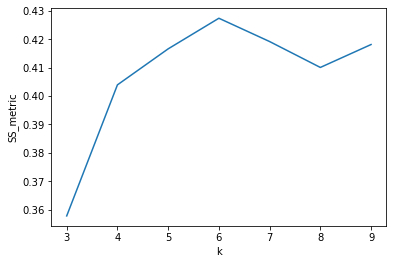

In [34]:
# Run this cell without changes

fig, ax = plt.subplots()


km_series = pd.Series(km_dict)
ax = km_series.plot()

ax.set_xlabel('k')
ax.set_ylabel('SS_metric')

plt.show()

#### f.

Based on the above plot, how many customer clusters does the SS metric suggest our data is most likely explained by?

In [ ]:
# Answer here:

"""


"""